# Data visualization for DFW, TX

In [39]:
import networkx as nx # Use 1.11, NOT 2.0 (2.0 is not backwards-compatible!)
import numpy as np
from matplotlib import rcParams  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pickle

import os

# matlab io
import scipy.io as sio
from scipy.sparse import csr_matrix

%matplotlib inline
rcParams['figure.figsize'] = (10, 10) #Size of figure  

rcParams['figure.dpi'] = 125

# Parameters

In [40]:
data_dir = 'Data/'

road_data_dir = data_dir+'road_network/'

power_data_dir = data_dir+'power_network/'

figure_data_dir = data_dir+'fig/'

emissions_data_dir = data_dir+'emissions/'

commute_data_dir = data_dir+'commuting_data/'

scenario_dir = 'scenario/'

# Input files

In [41]:
coordinated_output_file   = scenario_dir+'dfw_roadgraph_tv_25cl_10h_1800step_returntripsFalse_discountedcost_results.mat'
uncoordinated_output_file = scenario_dir+'dfw_roadgraph_tv_25cl_10h_1800step_returntripsFalse_discountedcost_noncoord_results.mat'

# Exploring the time-varying results

In [42]:
TVSimOutput=sio.loadmat(coordinated_output_file) 

TVSimOutput_uncoord=sio.loadmat(uncoordinated_output_file)


In [43]:
try:
    tplot = np.array(TVSimOutput['tplot'][0])
except:
    stepsize = float(np.array(TVSimOutput['timeStepSize']))
    DepTimeHist = np.array(TVSimOutput['DepTimeHist'][0])
    tplot = np.linspace(5,5+float(stepsize)/3600.*DepTimeHist.shape[0],DepTimeHist.shape[0])
if tplot.shape == (0,):
    tplot = np.linspace(5,5+float(stepsize)/3600.*DepTimeHist.shape[0],DepTimeHist.shape[0])


In [44]:

#tplot = np.array(TVSimOutput['tplot'][0])
stepsize = np.array(TVSimOutput['timeStepSize'])
C = np.array(TVSimOutput['C'])[0][0]
nclusters = np.array(TVSimOutput['N'])[0][0]

DepTimeHist = np.array(TVSimOutput['DepTimeHist'][0])
ArrivalTimeHist = np.array(TVSimOutput['ArrivalTimeHist'][0])
ChargingVehicleHist = np.array(TVSimOutput['ChargingVehicleHist'][0])
DischargingVehicleHist = np.array(TVSimOutput['DischargingVehicleHist'][0])
PaxVehicleHist = np.array(TVSimOutput['PaxVehicleHist'][0])
RebVehicleHist = np.array(TVSimOutput['RebVehicleHist'][0])

FullPowerPrices = np.array(TVSimOutput['FullPowerPrices'])*float(3600./stepsize)#Convert from MWtimestep to MWh, which is 1/2 MWh
LMP_ISO_ordered = np.array(TVSimOutput['LMP_ISO_ordered'])*float(3600./stepsize)
PowerTotLoadsCoord = np.array(TVSimOutput['PowerTotLoads'])*float(stepsize/3600.)
ChargerPowerDemand_coord = np.array(TVSimOutput['ChargerPowerDemand'])*float(stepsize/3600.)
PowerExtLoads = np.array(TVSimOutput['PowerExtLoads'])*float(stepsize/3600.)
GenProd = np.array(TVSimOutput['GenProd'])*float(stepsize/3600.)
GenTotCost_coord = np.array(TVSimOutput['GenTotCost'])

AllVehicleCharge_coord = np.array(TVSimOutput['AllVehicleCharge'])
PaxVehicleCharge_coord = np.array(TVSimOutput['PaxVehicleCharge'])
RebVehicleCharge_coord = np.array(TVSimOutput['RebVehicleCharge'])



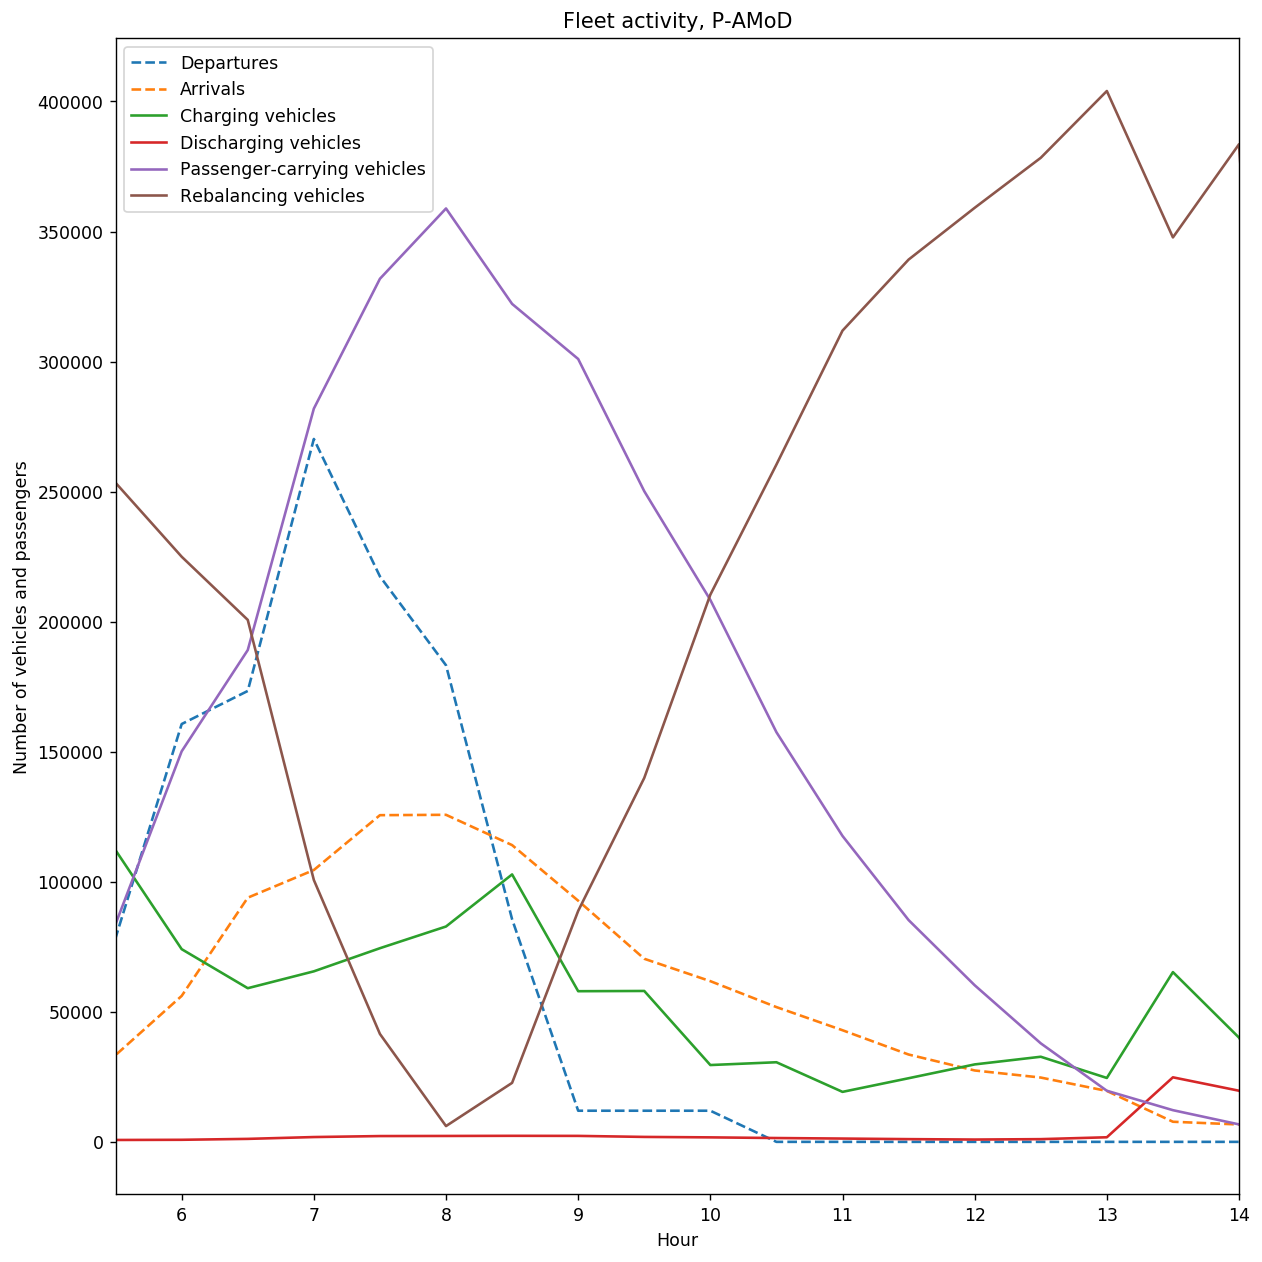

In [45]:

fig, ax1 = plt.subplots()
rcParams['figure.figsize'] = (10, 6)
dth, = ax1.plot(tplot,np.array(DepTimeHist),'--',label='Departures')
ath, = ax1.plot(tplot,ArrivalTimeHist,'--',label='Arrivals')
cvh, = ax1.plot(tplot,ChargingVehicleHist.T,label='Charging vehicles')
dvh, = ax1.plot(tplot,DischargingVehicleHist.T,label='Discharging vehicles')
pvh, = ax1.plot(tplot,PaxVehicleHist.T,label='Passenger-carrying vehicles')
rvh, = ax1.plot(tplot,RebVehicleHist.T,label='Rebalancing vehicles')

ax1.set_xlim([5.5,14.])
ax1.set_title('Fleet activity, P-AMoD')
fig.tight_layout()


plt.legend(handles=[dth,ath,cvh,dvh,pvh,rvh])
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of vehicles and passengers')
plt.show()



In [46]:
print 'Average travel time (P-AMoD)', sum(tplot*(ArrivalTimeHist-DepTimeHist))/sum(DepTimeHist), ' h'


Average travel time (P-AMoD) 0.4927912872950297  h


In [47]:

LMP_ISO=TVSimOutput_uncoord['LMP_ISO']*float(3600./stepsize)
LMP_post=TVSimOutput_uncoord['LMP_post']*float(3600./stepsize)
LMP_ISO_ordered_uncoord=TVSimOutput_uncoord['LMP_ISO_ordered']*float(3600./stepsize)
LMP_post_ordered=TVSimOutput_uncoord['LMP_post_ordered']*float(3600./stepsize)

PowerTotLoadsUncoord = np.array(TVSimOutput_uncoord['PowerTotLoads'])*float(stepsize/3600.)
ChargerPowerDemand_uncoord = np.array(TVSimOutput_uncoord['ChargerPowerDemand'])*float(stepsize/3600.)
GenProd_ISO = np.array(TVSimOutput_uncoord['GenProd_ISO'])*float(stepsize/3600.)
GenProd_post = np.array(TVSimOutput_uncoord['GenProd_post'])*float(stepsize/3600.)
GenTotCost_post = np.array(TVSimOutput_uncoord['GenTotCost_post'])
GenTotCost_ISO = np.array(TVSimOutput_uncoord['GenTotCost_ISO'])

DepTimeHist_uncoord = np.array(TVSimOutput_uncoord['DepTimeHist'][0])
ArrivalTimeHist_uncoord = np.array(TVSimOutput_uncoord['ArrivalTimeHist'][0])
ChargingVehicleHist_uncoord = np.array(TVSimOutput_uncoord['ChargingVehicleHist'][0])
DischargingVehicleHist_uncoord = np.array(TVSimOutput_uncoord['DischargingVehicleHist'][0])
PaxVehicleHist_uncoord = np.array(TVSimOutput_uncoord['PaxVehicleHist'][0])
RebVehicleHist_uncoord = np.array(TVSimOutput_uncoord['RebVehicleHist'][0])
AllVehicleCharge_uncoord = np.array(TVSimOutput_uncoord['AllVehicleCharge'])
PaxVehicleCharge_uncoord = np.array(TVSimOutput_uncoord['PaxVehicleCharge'])
RebVehicleCharge_uncoord = np.array(TVSimOutput_uncoord['RebVehicleCharge'])

[NP,Thor] = LMP_ISO.shape

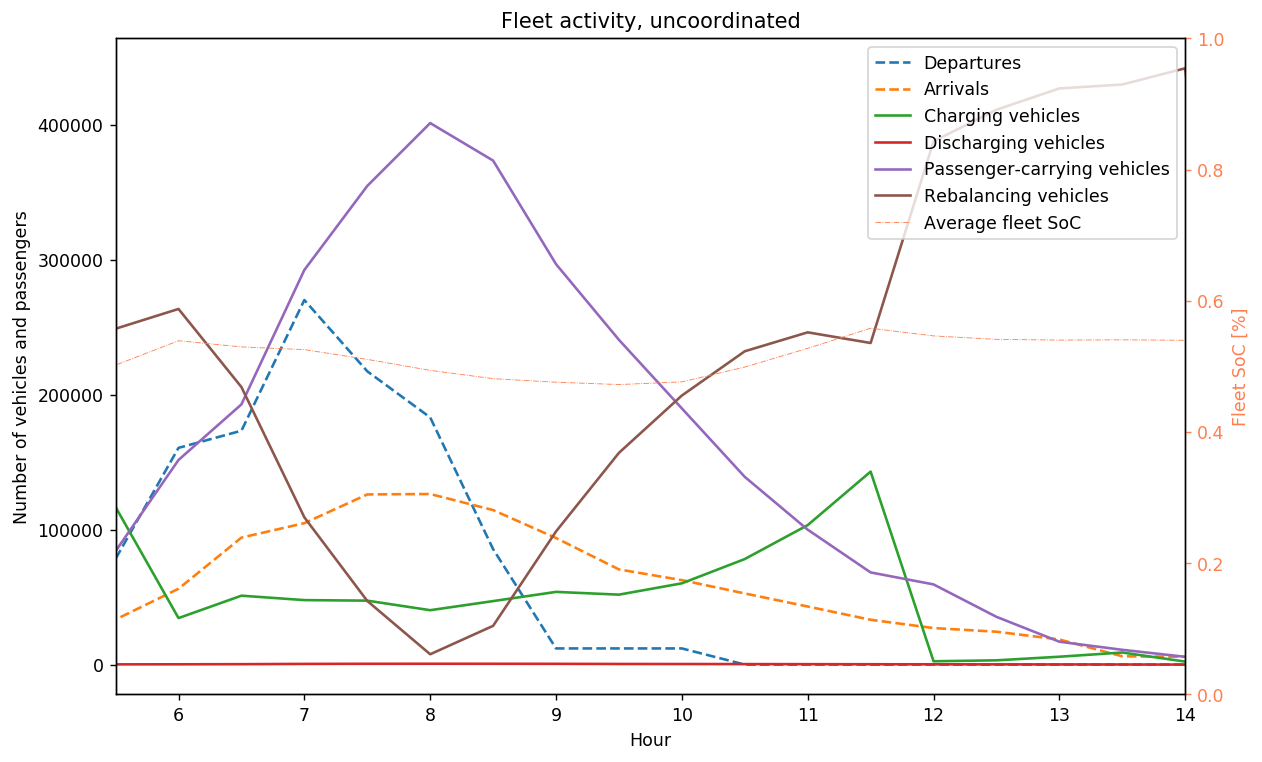

In [48]:

fig, ax1 = plt.subplots()
rcParams['figure.figsize'] = (10, 6)
dth, = ax1.plot(tplot,np.array(DepTimeHist_uncoord),'--',label='Departures')
ath, = ax1.plot(tplot,ArrivalTimeHist_uncoord,'--',label='Arrivals')
cvh, = ax1.plot(tplot,ChargingVehicleHist_uncoord.T,label='Charging vehicles')
dvh, = ax1.plot(tplot,DischargingVehicleHist_uncoord.T,label='Discharging vehicles')
pvh, = ax1.plot(tplot,PaxVehicleHist_uncoord.T,label='Passenger-carrying vehicles')
rvh, = ax1.plot(tplot,RebVehicleHist_uncoord.T,label='Rebalancing vehicles')
#

ax2 = ax1.twinx()
soh, = ax2.plot(tplot,AllVehicleCharge_uncoord.T/float(C),'-.',label='Average fleet SoC',linewidth=0.5,color='coral')
ax2.set_ylabel('Fleet SoC [%]', color='coral')
ax2.tick_params('y', colors='coral')
ax2.set_ylim([0,1])
ax1.set_xlim([5.5,14.])
ax1.set_title('Fleet activity, uncoordinated')
fig.tight_layout()


plt.legend(handles=[dth,ath,cvh,dvh,pvh,rvh,soh])
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of vehicles and passengers')
plt.show()



In [49]:
print 'Average travel time (uncoord.)', sum(tplot*(ArrivalTimeHist_uncoord-DepTimeHist_uncoord))/sum(DepTimeHist_uncoord), ' h'


Average travel time (uncoord.) 0.47298291610385357  h


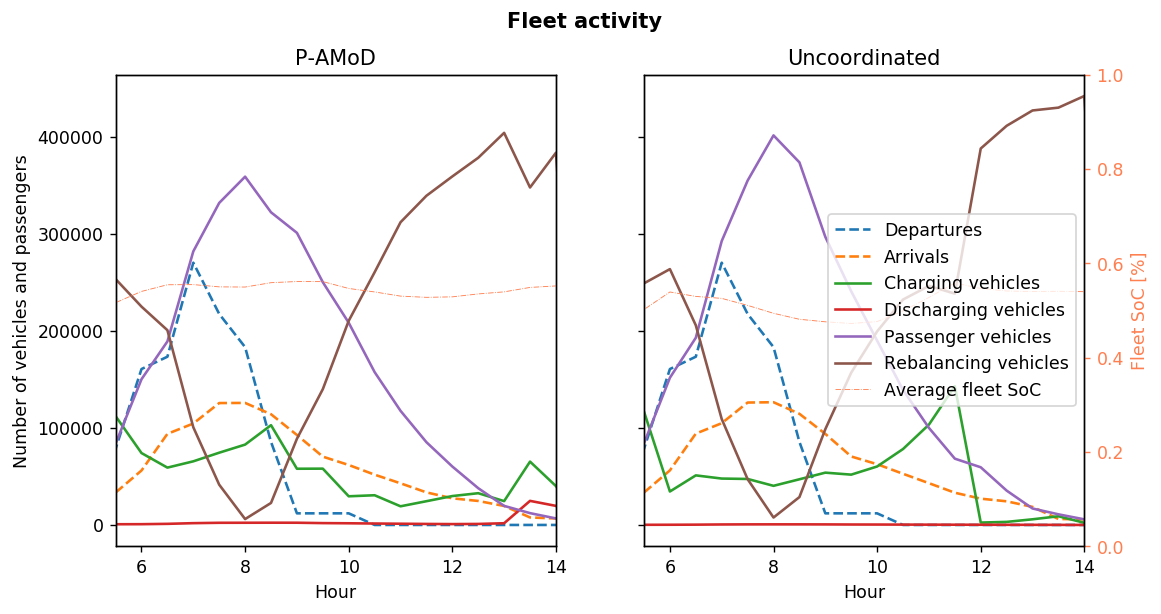

In [50]:

f, axarr = plt.subplots(1, 2, sharey=True,figsize=(10,5))
ax1=axarr[0]
ax2=axarr[1]

st=f.suptitle("Fleet activity",fontsize='large',fontweight='bold')
#ax1 = plt.subplot(121)

dth, = ax1.plot(tplot,np.array(DepTimeHist),'--',label='Departures')
ath, = ax1.plot(tplot,ArrivalTimeHist,'--',label='Arrivals')
cvh, = ax1.plot(tplot,ChargingVehicleHist.T,label='Charging vehicles')
dvh, = ax1.plot(tplot,DischargingVehicleHist.T,label='Discharging vehicles')
pvh, = ax1.plot(tplot,PaxVehicleHist.T,label='Passenger vehicles')
rvh, = ax1.plot(tplot,RebVehicleHist.T,label='Rebalancing vehicles')
#
#alh, = plt.plot(tplot,ChargingVehicleHist.T+DischargingVehicleHist.T+PaxVehicleHist.T+RebVehicleHist.T,label='Overall number of vehicles')

ax1b = ax1.twinx()
soh, = ax1b.plot(tplot,AllVehicleCharge_coord.T/float(C),'-.',label='Average fleet SoC',linewidth=0.5,color='coral')
#ax1b.set_ylabel('Fleet SoC [%]', color='coral')
ax1b.tick_params('y', colors=[0,0,0,0])
ax1b.set_ylim([0,1])

ax1.set_xlim([5.5,14.])
ax1.set_title('P-AMoD')
#fig.tight_layout()


#plt.legend(handles=[dth,ath,cvh,dvh,pvh,rvh])
#plt.legend(handles=[dth,ath,cvh,dvh,pvh,rvh,soh],loc='upper left')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of vehicles and passengers')
#plt.show()


#ax2 = plt.subplot(122,sharey=ax1)
dth, = ax2.plot(tplot,np.array(DepTimeHist_uncoord),'--',label='Departures')
ath, = ax2.plot(tplot,ArrivalTimeHist_uncoord,'--',label='Arrivals')
cvh, = ax2.plot(tplot,ChargingVehicleHist_uncoord.T,label='Charging vehicles')
dvh, = ax2.plot(tplot,DischargingVehicleHist_uncoord.T,label='Discharging vehicles')
pvh, = ax2.plot(tplot,PaxVehicleHist_uncoord.T,label='Passenger vehicles')
rvh, = ax2.plot(tplot,RebVehicleHist_uncoord.T,label='Rebalancing vehicles')
#
#alh, = plt.plot(tplot,ChargingVehicleHist.T+DischargingVehicleHist.T+PaxVehicleHist.T+RebVehicleHist.T,label='Overall number of vehicles')

ax2b = ax2.twinx()
soh, = ax2b.plot(tplot,AllVehicleCharge_uncoord.T/float(C),'-.',label='Average fleet SoC',linewidth=0.5,color='coral')
ax2b.set_ylabel('Fleet SoC [%]', color='coral')
ax2b.tick_params('y', colors='coral')
ax2b.set_ylim([0,1])
ax2.set_xlim([5.5,14.])
ax2.set_title('Uncoordinated')
#fig.tight_layout()


plt.legend(handles=[dth,ath,cvh,dvh,pvh,rvh,soh],loc='center right')
ax2.set_xlabel('Hour')
#ax2.set_ylabel('Number of vehicles and passengers')
#plt.show()

plt.savefig('Fleet_activity.pdf',bbox_inches='tight',facecolor='w')

In [51]:
print 'Overall cost of electricity (coord, uncoord, iso)', np.sum(FullPowerPrices*PowerTotLoadsCoord), np.sum(LMP_post*PowerTotLoadsUncoord), np.sum(LMP_ISO*PowerExtLoads)
print 'Overall saving with coordination: ', np.sum(FullPowerPrices*PowerTotLoadsCoord-LMP_post*PowerTotLoadsUncoord), np.sum(FullPowerPrices*PowerTotLoadsCoord-LMP_ISO*PowerExtLoads)

print 'Power demand (coord, uncoord, iso): ', np.sum(PowerTotLoadsCoord), np.sum(PowerTotLoadsUncoord), np.sum(PowerExtLoads)
print 'TSO power demand (coord, uncoord): ', np.sum(ChargerPowerDemand_coord), np.sum(ChargerPowerDemand_uncoord)
print 'Overall generation cost (coord, uncoord, iso):', np.sum(GenTotCost_coord), np.sum(GenTotCost_post), np.sum(GenTotCost_ISO)
print 'Overall generation cost per 100 KW (coord, uncoord, ISO): ', np.sum(GenTotCost_coord)/np.sum(PowerTotLoadsCoord), np.sum(GenTotCost_post)/np.sum(PowerTotLoadsUncoord), np.sum(GenTotCost_ISO)/np.sum(PowerExtLoads)

Overall cost of electricity (coord, uncoord, iso) 40653147.165837586 40015180.34697812 38064558.078731485
Overall saving with coordination:  637966.8188594613 2588589.087106098
Power demand (coord, uncoord, iso):  5010.470454778074 5004.304480134365 4905.722441079908
TSO power demand (coord, uncoord):  104.74801369816569 98.58203905445677
Overall generation cost (coord, uncoord, iso): 39395970.334723234 39705048.604406394 38563530.266103745
Overall generation cost per 100 KW (coord, uncoord, ISO):  7862.7287976829675 7934.179217516421 7860.927871331967


In [52]:
outputS = open(road_data_dir+'SourcesGraph_'+str(nclusters)+'_v2.pkl', 'rb')
SourcesGraph=pickle.load(outputS)
outputS.close()

outputnp = open(road_data_dir+'NodePos_'+str(nclusters)+'_v2.pkl', 'rb')
nodepos = pickle.load(outputnp)
outputnp.close()

outputG = open(power_data_dir+'Gpower_'+str(nclusters)+'_v2.pkl', 'rb')
Gpower=pickle.load(outputG)
outputG.close()

outputD = open(power_data_dir+'isbusinDallas'+str(nclusters)+'_v2.pkl', 'rb')
isbusinDallas=pickle.load(outputD)
outputD.close()

outputC = open(power_data_dir+'isbusaCharger'+str(nclusters)+'_v2.pkl', 'rb')
isbusaCharger=pickle.load(outputC)
outputC.close()

outputPNP = open(power_data_dir+'Pnodepos_'+str(nclusters)+'_v2.pkl', 'rb')
pnodepos_plot = pickle.load(outputPNP)
outputPNP.close()

inputcCT = open(road_data_dir+'DFWCounties.pkl', 'rb')
ctboundaries=pickle.load(inputcCT)

In [53]:
# Compute and print prices
def print_tot_prices(LMPs,Powers,Labels,Mask=None):
    assert len(LMPs) == len(Powers)
    assert len(LMPs) == len(Labels)
    if Mask is None:
        Mask = np.ones(LMPs[0].shape[0])>0
    for ix in range(len(Labels)):
        print Labels[ix], np.sum(np.sum(np.multiply(LMPs[ix],Powers[ix]),axis=1)*Mask)

def print_unit_prices(LMPs,Powers,Labels,Mask=None):
    assert len(LMPs) == len(Powers)
    assert len(LMPs) == len(Labels)
    if Mask is None:
        Mask = np.ones(LMPs[0].shape[0])>0
    for ix in range(len(Labels)):
        print Labels[ix], np.sum(np.sum(np.multiply(LMPs[ix],Powers[ix]),axis=1)*Mask)/np.sum(np.sum(Powers[ix],axis=1)*Mask)

def print_tot_price_history(TimePlt,LMPs,Powers,Labels,Mask=None):
    assert len(LMPs) == len(Powers)
    assert len(LMPs) == len(Labels)
    if Mask is None:
        Mask = np.ones(LMPs[0].shape[0])>0
    for ix in range(len(Labels)):
        print Labels[ix], np.dot(np.transpose(LMPs[ix]*Powers[ix]),Mask)
        plt.plot(TimePlt,np.dot(np.transpose(LMPs[ix]*Powers[ix]),Mask),label=Labels[ix])
    plt.legend()
    
def print_unit_price_history(TimePlt,LMPs,Powers,Labels,Mask=None,TRange=None,LineStyles=None):
    assert len(LMPs) == len(Powers)
    assert len(LMPs) == len(Labels)
    if Mask is None:
        Mask = np.ones(LMPs[0].shape[0])>0
    if TRange is None:
        TRange=[0, len(TimePlt)]
    if LineStyles is None:
        LineStyles = ['-']*len(Labels)
        
    
    for ix in range(len(Labels)):
        TmpCosts = np.dot(np.transpose(LMPs[ix]*Powers[ix]),Mask)/np.dot(np.transpose(Powers[ix]),Mask)
        print Labels[ix], TmpCosts
        plt.plot(TimePlt[TRange[0]:TRange[1]],TmpCosts[TRange[0]:TRange[1]],LineStyles[ix],label=Labels[ix])
    plt.legend()
        

In [54]:
# Price paid by the TSO
# ChargerPowerDemand*Prices. But ChargerPowerDemand is indexed by charging nodes. So we use prices from LMP_ISO_ordered (coordinated) and LMP_post_ordered (for uncoord) 
LMPs = [LMP_ISO,FullPowerPrices,LMP_post]
AllPowers = [PowerExtLoads,PowerTotLoadsCoord,PowerTotLoadsUncoord]
ExtPowers = [PowerExtLoads,PowerExtLoads,PowerExtLoads]
Labels = ['      ISO only: ','   coordinated: ',' uncoordinated: ']

print 'Price paid by the TSO'
print_tot_prices([LMP_ISO_ordered,LMP_post_ordered],[ChargerPowerDemand_coord,ChargerPowerDemand_uncoord],['   coordinated: ',' uncoordinated: '])
print 'Unit price paid by the TSO'
print_unit_prices([LMP_ISO_ordered,LMP_post_ordered],[ChargerPowerDemand_coord,ChargerPowerDemand_uncoord],['   coordinated: ',' uncoordinated: '])


# Total price paid (as a sanity check, we already compute that above)
print 'Price paid by all'
print_tot_prices(LMPs,AllPowers,Labels)
print 'Price paid by all per 100 KW'
print_unit_prices(LMPs,AllPowers,Labels)



# Overall price paid and price per KW paid by everyone else
print 'Price paid by everyone else'
print_tot_prices(LMPs,ExtPowers,Labels)
print 'Price per hundred KW paid by everyone else'
print_unit_prices(LMPs,ExtPowers,Labels)
print '\n'

# Cost of generation
print 'Cost of generation\n     ISO only: ', np.sum(GenTotCost_ISO),'\n  coordinated: ', np.sum(GenTotCost_coord),'\nuncoordinated: ',np.sum(GenTotCost_post)
print 'Cost of generation per hundred KW \n     ISO only: ', np.sum(GenTotCost_ISO)/np.sum(PowerExtLoads),'\n  coordinated: ', np.sum(GenTotCost_coord)/np.sum(PowerTotLoadsCoord),'\nuncoordinated: ',np.sum(GenTotCost_post)/np.sum(PowerTotLoadsUncoord)

print '\n'

# Total price paid in Dallas
print 'Price paid by all in Dallas'
print_tot_prices(LMPs,AllPowers,Labels,isbusinDallas)
print 'Price per hundred KW paid by all in Dallas'
print_unit_prices(LMPs,AllPowers,Labels,isbusinDallas)

# Total price paid by others in Dallas
print 'Price paid by everyone else in Dallas'
print_tot_prices(LMPs,ExtPowers,Labels,isbusinDallas)
print 'Price per hundred KW paid by everyone else in Dallas'
print_unit_prices(LMPs,ExtPowers,Labels,isbusinDallas)

# Total price paid by others NOT in Dallas
print 'Price paid by everyone else NOT in Dallas'
print_tot_prices(LMPs,ExtPowers,Labels,1-isbusinDallas)
print 'Price per hundred KW paid by everyone else NOT in Dallas'
print_unit_prices(LMPs,ExtPowers,Labels,1-isbusinDallas)

# Total price paid by others at chg. nodes
print 'Price paid by all at charging nodes'
print_tot_prices(LMPs,AllPowers,Labels,isbusaCharger)
print 'Price per hundred KW paid by all at charging nodes'
print_unit_prices(LMPs,AllPowers,Labels,isbusaCharger)
# Total price paid by others at charging nodes
print 'Price paid by everyone else at charging nodes'
print_tot_prices(LMPs,ExtPowers,Labels,isbusaCharger)
print 'Price per 100 KW paid by everyone else at charging nodes'
print_unit_prices(LMPs,ExtPowers,Labels,isbusaCharger)

#Time history of prices in all three cases



# Sanity check: sum of ISO price and everyone else's price
#print 'Price paid by all (sanity check)\n      ISO only: ',np.sum(np.multiply(LMP_ISO,PowerExtLoads)) ,'\n   coordinated: ',np.sum(np.multiply(FullPowerPrices,PowerExtLoads))+np.sum(np.multiply(FullPowerPrices,PowerTotLoadsCoord-PowerExtLoads)),'\n uncoordinated: ',np.sum(np.multiply(LMP_post,PowerExtLoads))+np.sum(np.multiply(LMP_post_ordered,ChargerPowerDemand_uncoord))

#TODO: what is the power consumption in the coordinated and uncoordinated case? How does it compare to the minimal possible power consumption?

Price paid by the TSO
   coordinated:  744174.38203833
 uncoordinated:  983266.8030315752
Unit price paid by the TSO
   coordinated:  7104.424759620637
 uncoordinated:  9974.096828007565
Price paid by all
      ISO only:  38064558.078731485
   coordinated:  40653147.165837586
 uncoordinated:  40015180.34697812
Price paid by all per 100 KW
      ISO only:  7759.215596867776
   coordinated:  8113.638735674017
 uncoordinated:  7996.152213724557
Price paid by everyone else
      ISO only:  38064558.078731485
   coordinated:  39908972.78379926
 uncoordinated:  39031913.54394655
Price per hundred KW paid by everyone else
      ISO only:  7759.215596867776
   coordinated:  8135.187684000729
 uncoordinated:  7956.404793124489


Cost of generation
     ISO only:  38563530.266103745 
  coordinated:  39395970.334723234 
uncoordinated:  39705048.604406394
Cost of generation per hundred KW 
     ISO only:  7860.927871331967 
  coordinated:  7862.7287976829675 
uncoordinated:  7934.179217516421


Pr

<Figure size 375x375 with 0 Axes>

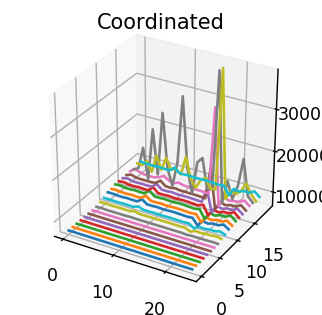

<Figure size 375x375 with 0 Axes>

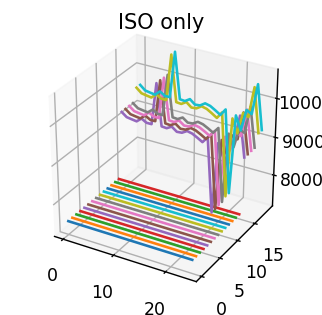

<Figure size 375x375 with 0 Axes>

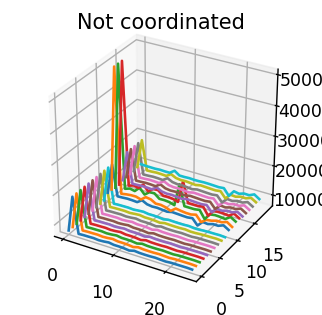

In [55]:
# LMPS at chargers only
rcParams['figure.figsize'] = (3, 3)

[NC,Thor] = LMP_ISO_ordered.shape

plt.figure()
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
for ctid in range(0,Thor):
    ax.plot(range(0,NC),ctid*np.ones(NC),LMP_ISO_ordered[:,ctid])
ax.set_title('Coordinated')
plt.show()

plt.figure()
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
for ctid in range(0,Thor):
    ax.plot(range(0,NC),ctid*np.ones(NC),LMP_ISO_ordered_uncoord[:,ctid])
ax.set_title('ISO only')
plt.show()

plt.figure()
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
for ctid in range(0,Thor):
    ax.plot(range(0,NC),ctid*np.ones(NC),LMP_post_ordered[:,ctid])
ax.set_title('Not coordinated')
#ax.set_zlim(bottom=0,top=8000)
plt.show()

    
#MeanCost.loc[1].MW

/home/frossi/Documents/PhD/amodenv/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


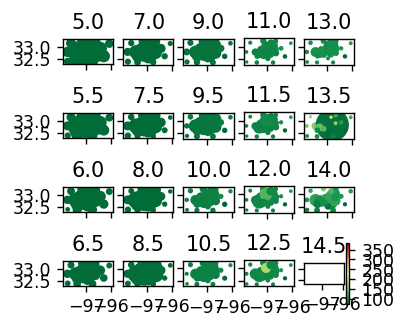

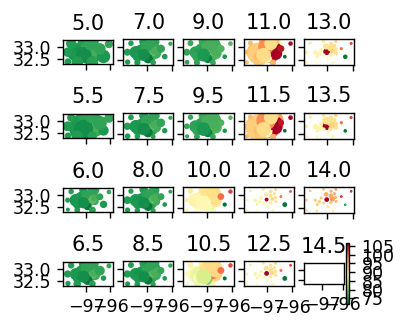

In [56]:
# Plot map of TX with color-coded prices and size representing power demand. 


rownum = 4
colnum = 5

f, axes = plt.subplots(rownum, colnum, sharex='col', sharey='row')
nodesizeoffset=0.

for tt in range(0,Thor):
    #Plot charging behavior. Node size: how many charge there. Node color: price.
    #plt.figure()
    myaxis = axes[tt % rownum][tt/rownum]
    nd=nx.draw_networkx_nodes(SourcesGraph,nodepos,ax=myaxis,node_color=LMP_ISO_ordered[:,tt]/100.,
                          node_size=np.maximum(ChargerPowerDemand_coord[:,tt]*100,nodesizeoffset), cmap=plt.cm.RdYlGn_r,
                          vmin=np.min(LMP_ISO_ordered/100.),vmax=np.max(LMP_ISO_ordered/100.))
    
    myaxis.set(adjustable='box-forced', aspect='equal')
    #plt.axis('equal')
    myaxis.set_title(str(float(tt)/2.+5))

    #nx.draw_networkx_labels(SourcesGraph,nodepos,nodelabels,font_size=16);
    #ed=nx.draw_networkx_edges(SourcesGraph,nodepos)
#                                                        ,edgelist=list(compress(RoadEdgesL,PaxFlows[...,-1]>0)),
#             edge_color=PaxFlows[...,-1][PaxFlows[...,-1]>0],
#                        edge_cmap=plt.cm.Blues,edge_vmin=np.min(PaxFlows[...,-1]),
#                        edge_vmax=np.max(PaxFlows[...,-1]),width=5,arrows=False)

    
plt.colorbar(nd)
# Plot map of TX with color-coded prices and size representing power demand. 


f, axes = plt.subplots(rownum, colnum, sharex='col', sharey='row')

for tt in range(0,Thor):
    #Plot charging behavior. Node size: how many charge there. Node color: price.
    #plt.figure()
    myaxis = axes[tt % rownum][tt/rownum]
    nd=nx.draw_networkx_nodes(SourcesGraph,nodepos,ax=myaxis,node_color=LMP_post_ordered[:,tt]/100.,
                          node_size=np.maximum(ChargerPowerDemand_uncoord[:,tt]*100,nodesizeoffset), cmap=plt.cm.RdYlGn_r,
                          vmin=np.min(LMP_post_ordered/100.),vmax=np.max(LMP_ISO_ordered_uncoord/100.))
    myaxis.set(adjustable='box-forced', aspect='equal')
    #plt.axis('equal')
    myaxis.set_title(str(float(tt)/2.+5))
    
    #nx.draw_networkx_labels(SourcesGraph,nodepos,nodelabels,font_size=16);
    #ed=nx.draw_networkx_edges(SourcesGraph,nodepos)
#                                                        ,edgelist=list(compress(RoadEdgesL,PaxFlows[...,-1]>0)),
#             edge_color=PaxFlows[...,-1][PaxFlows[...,-1]>0],
#                        edge_cmap=plt.cm.Blues,edge_vmin=np.min(PaxFlows[...,-1]),
#                        edge_vmax=np.max(PaxFlows[...,-1]),width=5,arrows=False)


    
plt.colorbar(nd)


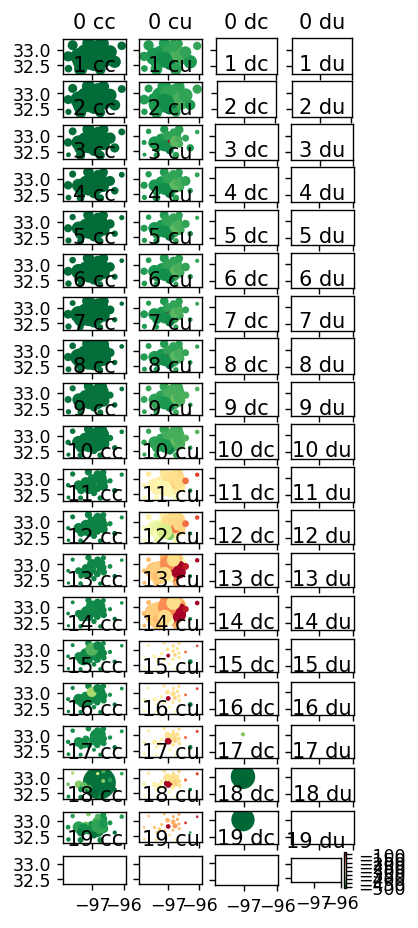

In [57]:
# Plot map of TX with color-coded prices and size representing power demand. 
rcParams['figure.figsize'] = (3, 9)

rownum = 20
colnum = 4

f, axes = plt.subplots(rownum, colnum, sharex='col', sharey='row')
nodesizeoffset=0.

for tt in range(0,Thor):
    #Plot charging behavior. Node size: how many charge there. Node color: price.
    #plt.figure()
    myaxis = axes[tt][0]
    nd=nx.draw_networkx_nodes(SourcesGraph,nodepos,ax=myaxis,node_color=LMP_ISO_ordered[:,tt]/100.,
                          node_size=np.maximum(ChargerPowerDemand_coord[:,tt]*100,nodesizeoffset), cmap=plt.cm.RdYlGn_r,
                          vmin=np.min(LMP_ISO_ordered/100.),vmax=np.max(LMP_ISO_ordered/100.))
    
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    myaxis.set_title(str(tt) + ' cc')
    
    myaxis = axes[tt][1]
    nd=nx.draw_networkx_nodes(SourcesGraph,nodepos,ax=myaxis,node_color=LMP_post_ordered[:,tt]/100.,
                          node_size=np.maximum(ChargerPowerDemand_uncoord[:,tt]*100,nodesizeoffset), cmap=plt.cm.RdYlGn_r,
                          vmin=np.min(LMP_post_ordered/100.),vmax=np.max(LMP_ISO_ordered_uncoord/100.))
    myaxis.set(adjustable='box-forced', aspect='equal')
    myaxis.set_title(str(tt) + ' cu')
    
    myaxis = axes[tt][2]
    nd=nx.draw_networkx_nodes(SourcesGraph,nodepos,ax=myaxis,node_color=-LMP_ISO_ordered[:,tt]/100.,
                          node_size=np.maximum(-ChargerPowerDemand_coord[:,tt]*100,nodesizeoffset), cmap=plt.cm.RdYlGn_r,
                          vmin=np.min(-LMP_ISO_ordered/100.),vmax=np.max(-LMP_ISO_ordered/100.))
    myaxis.set(adjustable='box-forced', aspect='equal')
    myaxis.set_title(str(tt) + ' dc')
    
    myaxis = axes[tt][3]
    nd=nx.draw_networkx_nodes(SourcesGraph,nodepos,ax=myaxis,node_color=-LMP_post_ordered[:,tt]/100.,
                          node_size=np.maximum(-ChargerPowerDemand_uncoord[:,tt]*100,nodesizeoffset), cmap=plt.cm.RdYlGn_r,
                          vmin=np.min(-LMP_post_ordered/100.),vmax=np.max(-LMP_ISO_ordered_uncoord/100.))
    myaxis.set(adjustable='box-forced', aspect='equal')
    myaxis.set_title(str(tt) + ' du')

    
plt.colorbar(nd)
# Plot map of TX with color-coded prices and size representing power demand. 



4998.226848024391 18390.816989178973


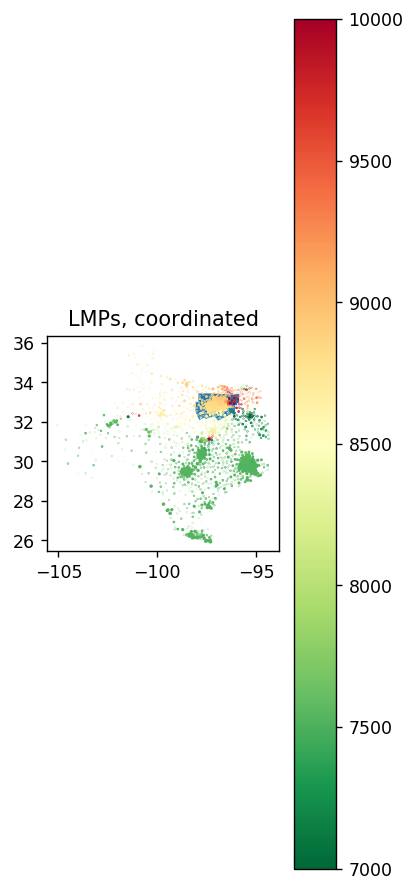

In [58]:
# # #Plot network

            
ax=ctboundaries.plot()
timeplot=11;

minprice_color=7e3;
maxprice_color=1e4

print min(FullPowerPrices[:,timeplot]), max(FullPowerPrices[:,timeplot]) 
nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=2*abs(PowerTotLoadsCoord[:,timeplot]),
                            node_color=FullPowerPrices[:,timeplot],ax=ax,arrows=False,
                            cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post[:,timeplot]),np.min(FullPowerPrices[:,timeplot])),minprice_color),
                            vmax=min(max(np.max(LMP_post[:,timeplot]),np.max(FullPowerPrices[:,timeplot])),maxprice_color))

ax.set_title('LMPs, coordinated')
plt.colorbar(nd)

4998.226848024391 18390.816989178973
4662.2102829262685 50841.58623682369


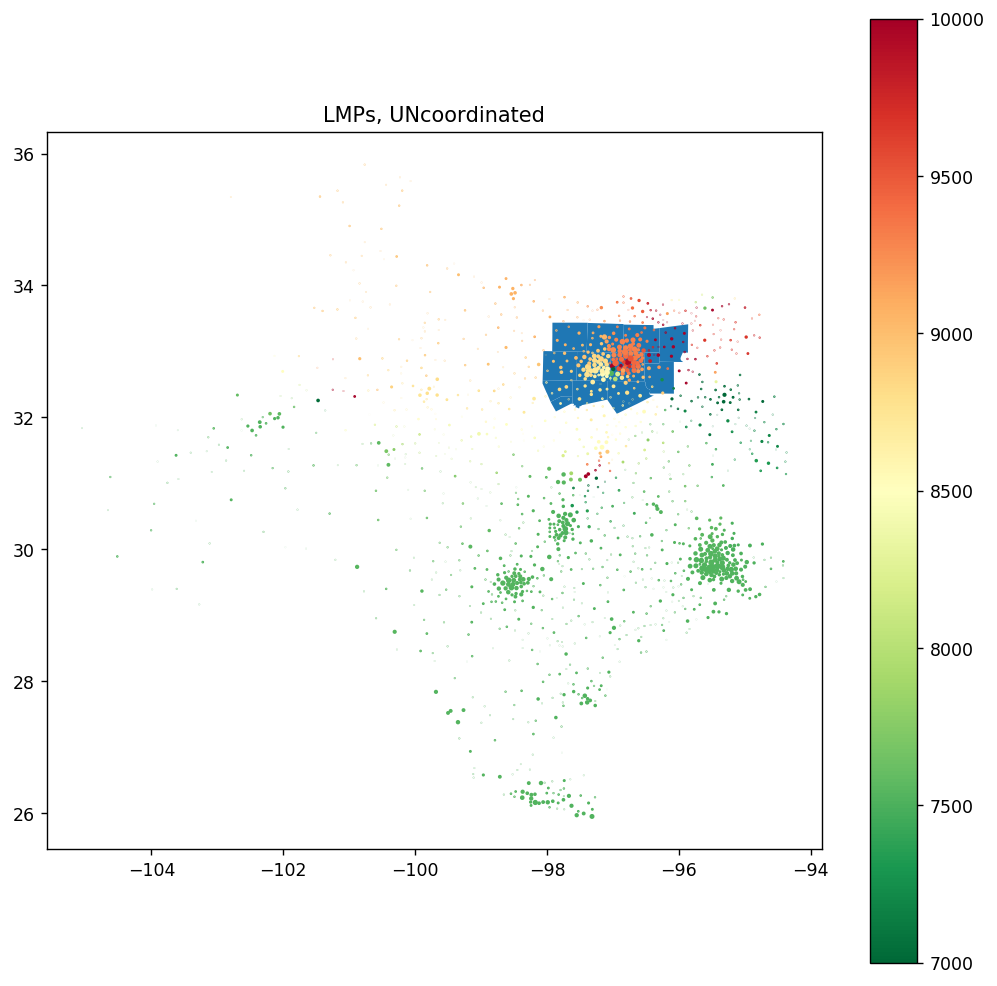

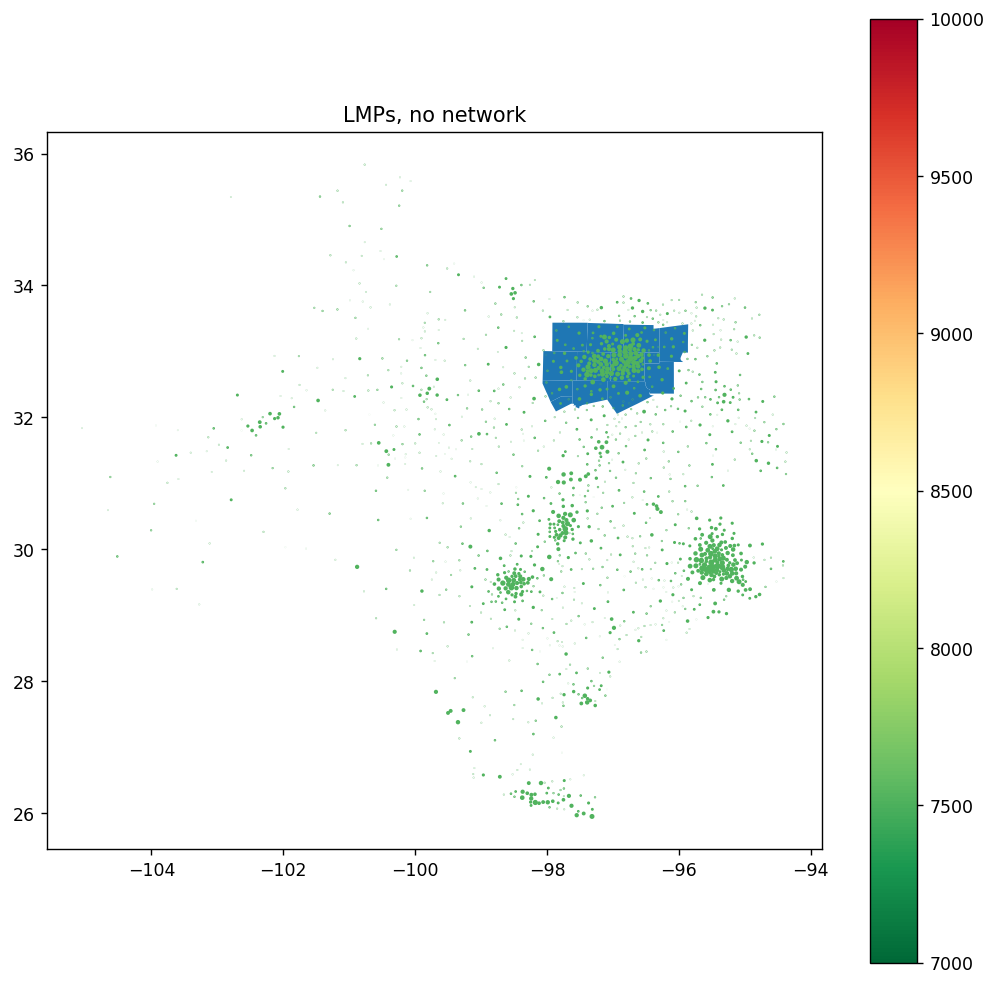

In [59]:
# #Plot network
rcParams['figure.figsize'] = (10, 10)
            
ax=ctboundaries.plot()
print min(FullPowerPrices[:,timeplot]), max(FullPowerPrices[:,timeplot]) 
print min(LMP_post[:,timeplot]), max(LMP_post[:,timeplot]) 


nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerTotLoadsUncoord[:,timeplot]),
                            node_color=LMP_post[:,timeplot],ax=ax,arrows=False,
                            cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post[:,timeplot]),np.min(FullPowerPrices[:,timeplot])),minprice_color),
                            vmax=min(max(np.max(LMP_post[:,timeplot]),np.max(FullPowerPrices[:,timeplot])),maxprice_color))


ax.set_title('LMPs, UNcoordinated')
plt.colorbar(nd)

PowerTotLoadsUncoord[:,timeplot]-PowerTotLoadsCoord[:,timeplot]

###

            
ax2=ctboundaries.plot()
nd2 = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerExtLoads[:,timeplot]),
                             node_color=LMP_ISO[:,timeplot],ax=ax2,arrows=False,
                             cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post[:,timeplot]),np.min(FullPowerPrices[:,timeplot])),minprice_color),
                             vmax=min(max(np.max(LMP_post[:,timeplot]),np.max(FullPowerPrices[:,timeplot])),maxprice_color))


ax2.set_title('LMPs, no network')
plt.colorbar(nd2)


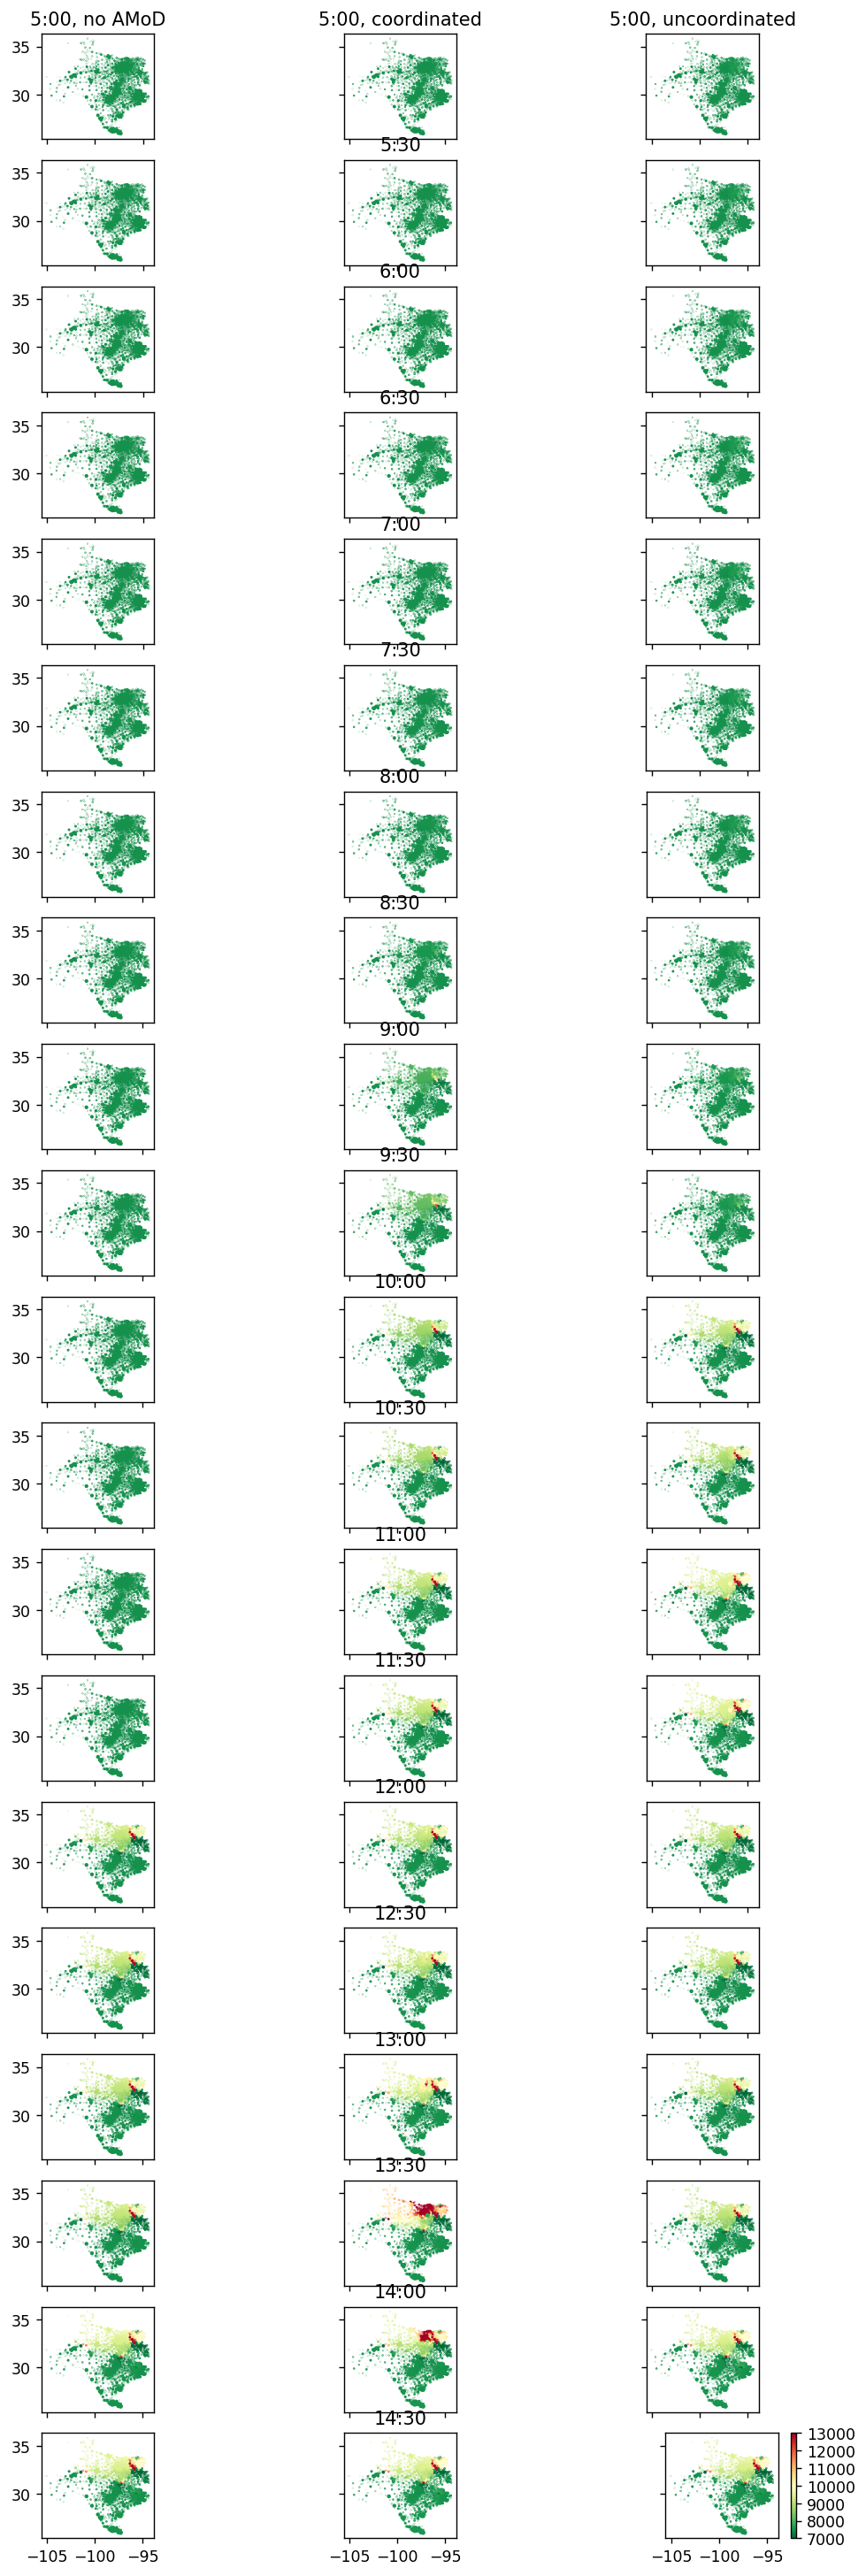

In [60]:
#Plot network
rownum = Thor
colnum = 3
            
rcParams['figure.figsize'] = (10, 30) #Size of figure  

minprice_color=7e3;
maxprice_color=1.3*1e4

f, axes = plt.subplots(rownum, colnum, sharex='col', sharey='row')
nodesizeoffset=0.


for timeplot in range(0,Thor):
    myhour = str(5+timeplot/2)
    if timeplot%2:
        mymin=':30'
    else:
        mymin=':00'
    mytime = myhour + mymin
    
    myaxis = axes[timeplot][1]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerTotLoadsCoord[:,timeplot]),
                                node_color=FullPowerPrices[:,timeplot],ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices)),minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices)),maxprice_color))    
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if timeplot == 0:
        myaxis.set_title(str(mytime) + ', coordinated')
    else:
        myaxis.set_title(str(mytime))
    
    myaxis = axes[timeplot][2]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerTotLoadsUncoord[:,timeplot]),
                                node_color=LMP_post[:,timeplot],ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices)),minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices)),maxprice_color))    
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if timeplot == 0:
        myaxis.set_title(str(mytime) + ', uncoordinated')
    #else:
    #    myaxis.set_title(str(timeplot))
        
    myaxis = axes[timeplot][0]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerExtLoads[:,timeplot]),
                                node_color=LMP_ISO[:,timeplot],ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices)),minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices)),maxprice_color))
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if timeplot == 0:
        myaxis.set_title(str(mytime) + ', no AMoD')
    #else:
    #    myaxis.set_title(str(timeplot))


plt.colorbar(nd)
    

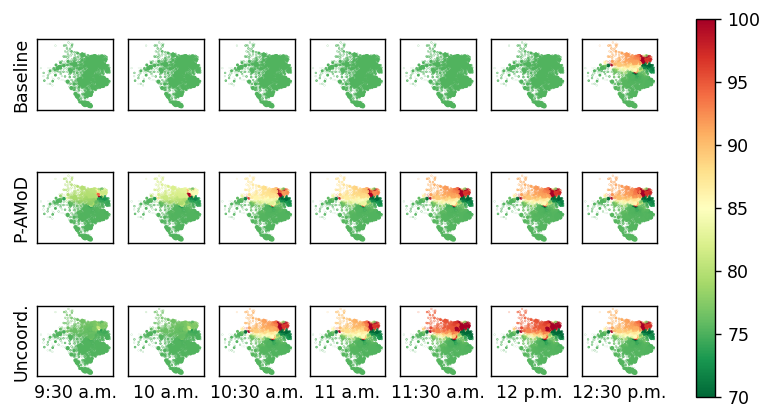

In [61]:
#Plot network
rownum = 3
colnum = 7
            
rcParams['figure.figsize'] = (8, 4) #Size of figure  

minprice_color=70.
maxprice_color=100.

f, axes = plt.subplots(rownum, colnum, sharex='col', sharey='row')
nodesizeoffset=0.

axisct=0;
timelabels = ['9:30 a.m.', '10 a.m.','10:30 a.m.', '11 a.m.', '11:30 a.m.', '12 p.m.', '12:30 p.m.' ]

for timeplot in range(8,15):
    
    #P-AMoD
    myaxis = axes[1][axisct]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerTotLoadsCoord[:,timeplot]),
                                node_color=FullPowerPrices[:,timeplot]/100.,ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices))/100.,minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices))/100.,maxprice_color))    
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if axisct == 0:
        #myaxis.set_title('P-AMoD')
        myaxis.set_ylabel('P-AMoD')
    myaxis.set_xticks([])
    myaxis.set_yticks([])
    
    #Uncooperative
    myaxis = axes[2][axisct]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerTotLoadsUncoord[:,timeplot]),
                                node_color=LMP_post[:,timeplot]/100.,ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices))/100.,minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices))/100.,maxprice_color))    
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if axisct == 0:
        #myaxis.set_title('Noncooperative')
        myaxis.set_ylabel('Uncoord.')
    myaxis.set_xlabel(timelabels[axisct])
    myaxis.set_xticks([])
    myaxis.set_yticks([])
    
    #Baseline
    myaxis = axes[0][axisct]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerExtLoads[:,timeplot]),
                                node_color=LMP_ISO[:,timeplot]/100.,ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices))/100.,minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices))/100.,maxprice_color))
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if axisct == 0:
        #myaxis.set_title('Baseline')
        myaxis.set_ylabel('Baseline')
    myaxis.set_xticks([])
    myaxis.set_yticks([])
    axisct+=1

f.colorbar(nd,ax=axes.ravel().tolist())
    
plt.savefig('LMPs_TX4.png',bbox_inches='tight',transparent=True)
plt.savefig('LMPs_TX4.pdf',bbox_inches='tight',transparent=True)

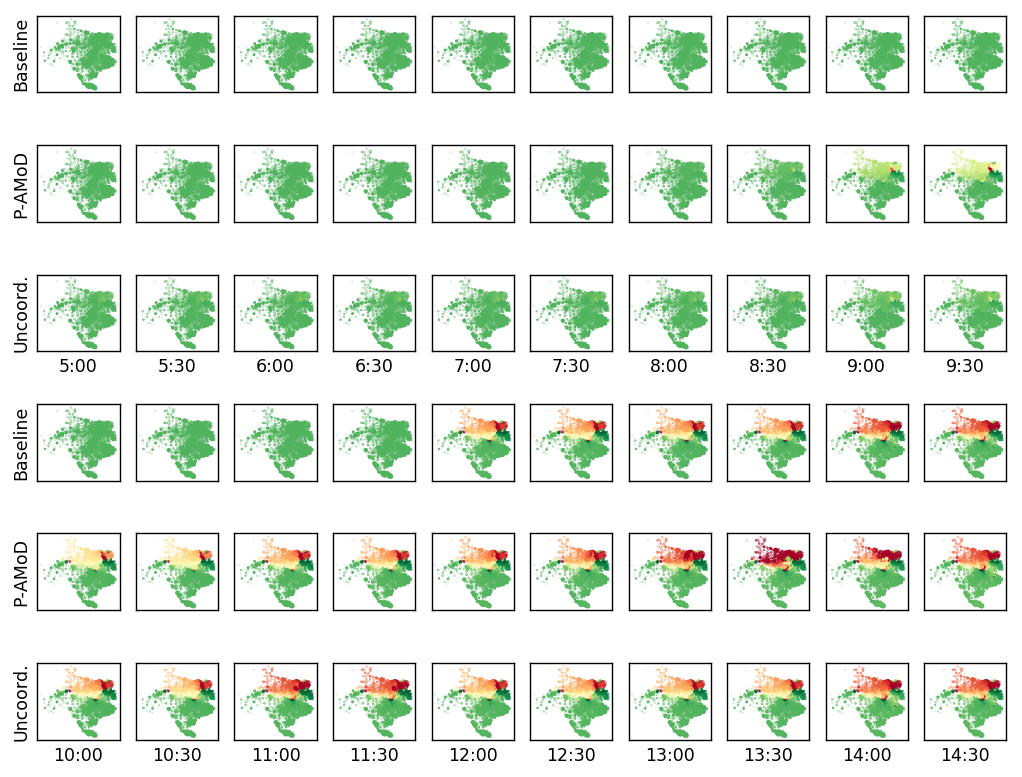

In [62]:
#Plot network
rownum = 2*3
colnum = Thor/2
            
rcParams['figure.figsize'] = (10, 8) #Size of figure  

minprice_color=70.
maxprice_color=100.

f, axes = plt.subplots(rownum, colnum, sharex='col', sharey='row')
nodesizeoffset=0.

axisct=0;

for timeplot in range(0,Thor):
    myhour = str(5+timeplot/2)
    if timeplot%2:
        mymin=':30'
    else:
        mymin=':00'
    mytime = myhour + mymin
    if timeplot<Thor/2:
        axoffset=0
        axctoffset=0
    else:
        axoffset=3;
        axctoffset=-Thor/2
    
    #P-AMoD
    myaxis = axes[axoffset+1][axisct+axctoffset]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerTotLoadsCoord[:,timeplot]),
                                node_color=FullPowerPrices[:,timeplot]/100.,ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices))/100.,minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices))/100.,maxprice_color))    
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if axisct + axctoffset == 0:
        #myaxis.set_title('P-AMoD')
        myaxis.set_ylabel('P-AMoD')
    myaxis.set_xticks([])
    myaxis.set_yticks([])
    
    #Uncooperative
    myaxis = axes[axoffset+2][axisct+axctoffset]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerTotLoadsUncoord[:,timeplot]),
                                node_color=LMP_post[:,timeplot]/100.,ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices))/100.,minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices))/100.,maxprice_color))    
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if axisct + axctoffset == 0:
        #myaxis.set_title('Noncooperative')
        myaxis.set_ylabel('Uncoord.')
    myaxis.set_xlabel(mytime)
    myaxis.set_xticks([])
    myaxis.set_yticks([])
    
    #Baseline
    myaxis = axes[axoffset+0][axisct+axctoffset]
    #ctboundaries.plot(ax=myaxis)
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=4*abs(PowerExtLoads[:,timeplot]),
                                node_color=LMP_ISO[:,timeplot]/100.,ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=max(min(np.min(LMP_post),np.min(FullPowerPrices))/100.,minprice_color),
                                vmax=min(max(np.max(LMP_post),np.max(FullPowerPrices))/100.,maxprice_color))
    myaxis.set(adjustable='box-forced', aspect='equal')
    #myaxis.set_title(str(float(tt)/2.+5) + ' cc')
    if axisct + axctoffset == 0:
        #myaxis.set_title('Baseline')
        myaxis.set_ylabel('Baseline')
    myaxis.set_xticks([])
    myaxis.set_yticks([])
    axisct+=1

#f.colorbar(nd,ax=axes.ravel().tolist())
    
plt.savefig('LMPs_TX_all.png',bbox_inches='tight',transparent=True)
plt.savefig('LMPs_TX_all.pdf',bbox_inches='tight',transparent=True)

In [63]:
# Power mix
# Read power per generator per hour in the three cases
#GenProd
#GenProd_ISO
#GenProd_post
# Group by generator type. The order of the generators is determined in this file when we write
# Show prod

## Plot energy mix

Text(0.5,1,'Energy mix, ISO')

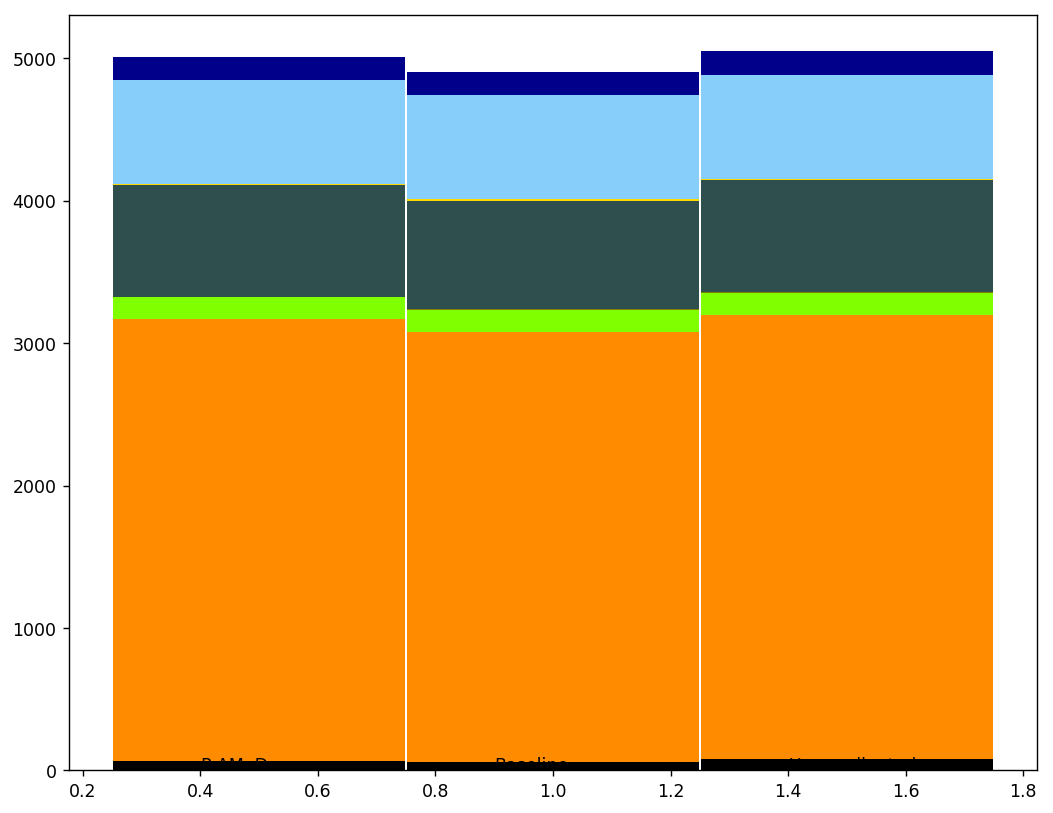

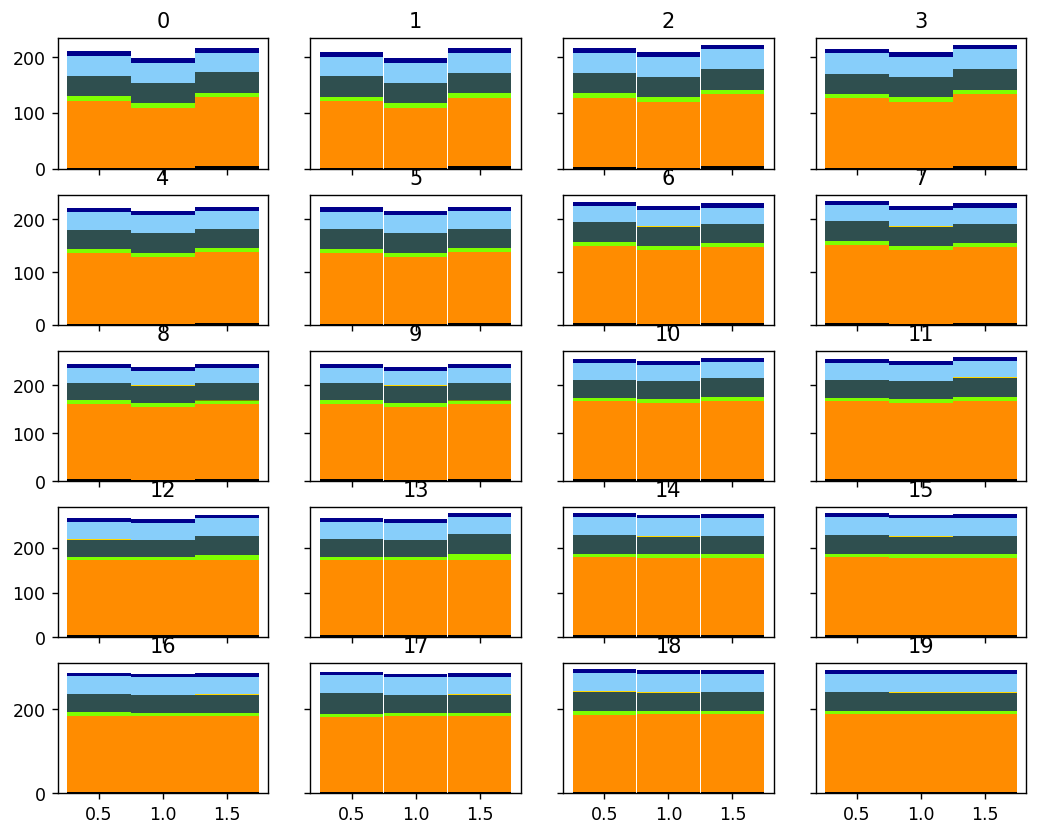

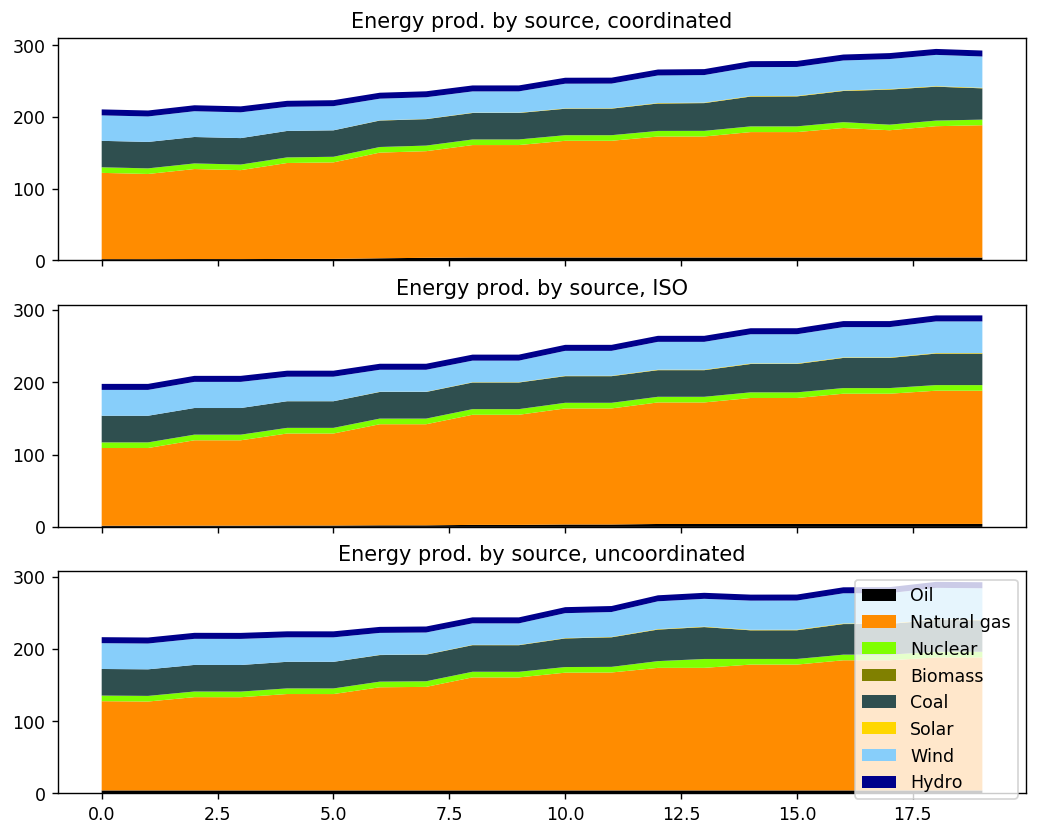

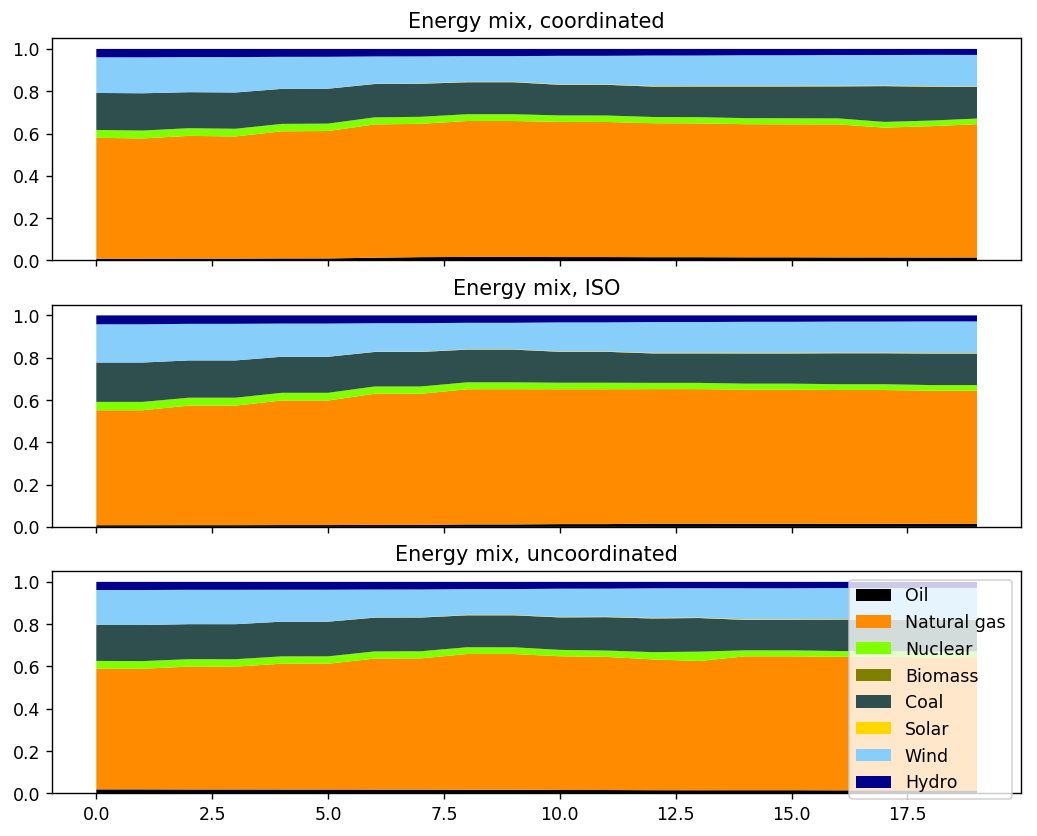

In [64]:
outputG = open(power_data_dir+'TXGenerators_v2.pkl', 'rb')
generators=pickle.load(outputG)
outputG.close()

gentypes=set(generators['type'])

#Extract information from the simulations
GenMix=np.zeros([len(gentypes),Thor])       # P-AMoD
GenMix_ISO=np.zeros([len(gentypes),Thor])   # Power network only
GenMix_post=np.zeros([len(gentypes),Thor])  # Uncoordinated

GenMixTot=np.zeros([len(gentypes)])
GenMixTot_ISO=np.zeros([len(gentypes)])
GenMixTot_post=np.zeros([len(gentypes)])

genct = 0
genlist = []
for gentype in gentypes:
    genlist.append(gentype)
    for t in range(Thor):
        GenMix[genct,t]=np.sum(GenProd[np.array(generators['type']==gentype),t])
        GenMix_ISO[genct,t]=np.sum(GenProd_ISO[np.array(generators['type']==gentype),t])
        GenMix_post[genct,t]=np.sum(GenProd_post[np.array(generators['type']==gentype),t])
    GenMixTot[genct]=sum(GenMix[genct,:])
    GenMixTot_ISO[genct]=sum(GenMix_ISO[genct,:])
    GenMixTot_post[genct]=sum(GenMix_post[genct,:])
    genct+=1


gencolors = ['black','darkorange','chartreuse','olive','darkslategray','gold','lightskyblue','darkblue']
    
# Stacked bar plot
plt.figure()
genct = 0
bar_width = 0.498
y_offset = np.zeros(3)
plt.text(0.4,1,'P-AMoD')
plt.text(0.9,1,'Baseline')
plt.text(1.4,1,'Uncoordinated')
for gentype in gentypes:
    #plt.bar(np.arange(3),np.array([GenMix[genct], GenMix_post[genct],GenMix_ISO[genct]]),  bar_width, bottom=y_offset)
    #print np.arange(3)
    #print np.array([GenMixTot[genct], GenMixTot_post[genct],GenMixTot_ISO[genct]])
    plt.bar(np.array([0.5, 1., 1.5]),np.array([GenMixTot[genct], GenMixTot_ISO[genct],GenMixTot_post[genct]]),
            bar_width, bottom=y_offset,color=gencolors[genct])
    y_offset = y_offset + [GenMixTot[genct], GenMixTot_ISO[genct],GenMixTot_post[genct]]
    genct+=1;
    #cell_text.append(['%1.1f' % (x/1000.0) for x in y_offset])

# Hour-by-hour stacked bar plot
nrowplot=5
ncolplot=4
bar_width = 0.495

f, axes = plt.subplots(nrowplot, ncolplot, sharex='col', sharey='row')
for tt in range(0,Thor):
    #Plot charging behavior. Node size: how many charge there. Node color: price.
    #plt.figure()
    myaxis = axes[tt/ncolplot][tt % ncolplot]
    genct = 0
    y_offset = np.zeros(3)
    for gentype in gentypes:
        myaxis.bar(np.array([0.5, 1., 1.5]),np.array([GenMix[genct,tt], GenMix_ISO[genct,tt],GenMix_post[genct,tt]]),
                bar_width, bottom=y_offset,color=gencolors[genct])
        y_offset = y_offset + [GenMix[genct,tt], GenMix_ISO[genct,tt],GenMix_post[genct,tt]]
        genct+=1;
        myaxis.set_title(str(tt))
    
    


#Energy production

f, axes = plt.subplots(3, 1, sharex='col', sharey='row')
axes[0].stackplot(range(Thor),GenMix,labels=genlist,colors=gencolors)
#plt.legend()
axes[0].set_title('Energy prod. by source, coordinated')

axes[2].stackplot(range(Thor),GenMix_post,labels=genlist,colors=gencolors)
#plt.legend()
axes[2].set_title('Energy prod. by source, uncoordinated')

axes[1].stackplot(range(Thor),GenMix_ISO,labels=genlist,colors=gencolors)
plt.legend()
axes[1].set_title('Energy prod. by source, ISO')


#Normalized plot
GenMix_n=GenMix.copy()
GenMix_ISO_n=GenMix_ISO.copy()
GenMix_post_n=GenMix_post.copy()
for t in range(Thor):
    GenMix_n[:,t]=GenMix_n[:,t]/sum(GenMix_n[:,t])
    GenMix_ISO_n[:,t]=GenMix_ISO_n[:,t]/sum(GenMix_ISO_n[:,t])
    GenMix_post_n[:,t]=GenMix_post_n[:,t]/sum(GenMix_post_n[:,t])


f, axes = plt.subplots(3, 1, sharex='col', sharey='row')
axes[0].stackplot(range(Thor),GenMix_n,labels=genlist,colors=gencolors)
#plt.legend()
axes[0].set_title('Energy mix, coordinated')

axes[2].stackplot(range(Thor),GenMix_post_n,labels=genlist,colors=gencolors)
#plt.legend()
axes[2].set_title('Energy mix, uncoordinated')

axes[1].stackplot(range(Thor),GenMix_ISO_n,labels=genlist,colors=gencolors)
plt.legend()
axes[1].set_title('Energy mix, ISO')


Baseline [7519.99933256 7519.99933256 7519.9998092  7519.9998092  7520.00022796
 7520.00022796 7520.00094087 7520.00094087 7520.00234401 7520.00234401
 7520.00615899 7520.00615899 7520.18351815 7520.18351826 8157.81565325
 8157.8145156  8161.16349784 8161.16349761 8304.12646063 8304.12642937]
P-AMoD [ 7522.48437354  7522.24520512  7522.6367389   7522.32394373
  7523.02683236  7523.35692352  7529.60169503  7556.68633033
  7708.6227613   7799.49299516  8017.97619982  8045.98799011
  8164.98122441  8173.39061917  8221.74984555  8280.4343942
  8505.40787122 10614.62364699  8942.09890177  8337.38088589]
Uncoord. [7581.40878998 7588.95206258 7567.47202689 7576.98860689 7572.16755823
 7572.04371582 7569.68436559 7574.52982485 7606.89923422 7605.85440467
 8201.68984576 8306.81711966 8639.4415888  8766.32267295 8172.78954638
 8173.71596465 8179.6191784  8183.06862686 8358.32749325 8303.89324276]


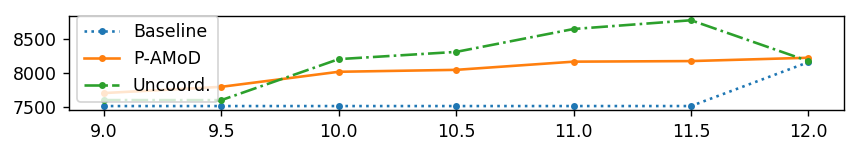

In [65]:

rcParams['figure.figsize'] = (8, 1)
plt.figure()
print_unit_price_history(tplot,LMPs,AllPowers,['Baseline','P-AMoD','Uncoord.'],None,[8, 15],['.:','.-','.-.'])
#plt.ylim([7000,8500])
#print_unit_cost_history(LMPs,AllPowers,Labels,isbusinDallas)
#plt.savefig('LMPs_TX_line.pdf',bbox_inches='tight',transparent=True)

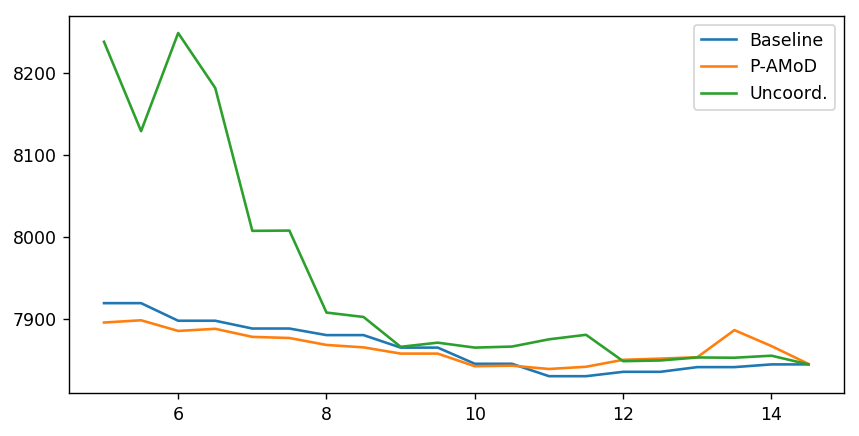

In [66]:
rcParams['figure.figsize'] = (8, 4)
plt.figure()

plt.plot(tplot,np.squeeze(GenTotCost_ISO)/np.sum(PowerExtLoads,axis=0),label='Baseline')
plt.plot(tplot,np.squeeze(GenTotCost_coord)/np.sum(PowerTotLoadsCoord,axis=0),label='P-AMoD')
plt.plot(tplot,np.squeeze(GenTotCost_post)/np.sum(PowerTotLoadsUncoord,axis=0),label='Uncoord.')
plt.legend()